Проект: Исследование объявлений о продаже квартир. 
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.
Цели исследования и задачи:
1. изучение общей информации
2. предобработка данных
3. добавление в таблицу новых столбцов со следующими параметрами: 
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах
3. изучение как быстро продавались квартиры
4. определение факторов, которые больше всего влияют на стоимость объекта недвижимости
5. Рассчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
6. Общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') #прочитаем файл

In [3]:
data.head() #выведем первые 5 значений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.shape #проведем разведочный анализ данных

(23699, 22)

In [5]:
data.info() #выведем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.duplicated().sum() #посчитаем количество явных дубликтов

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

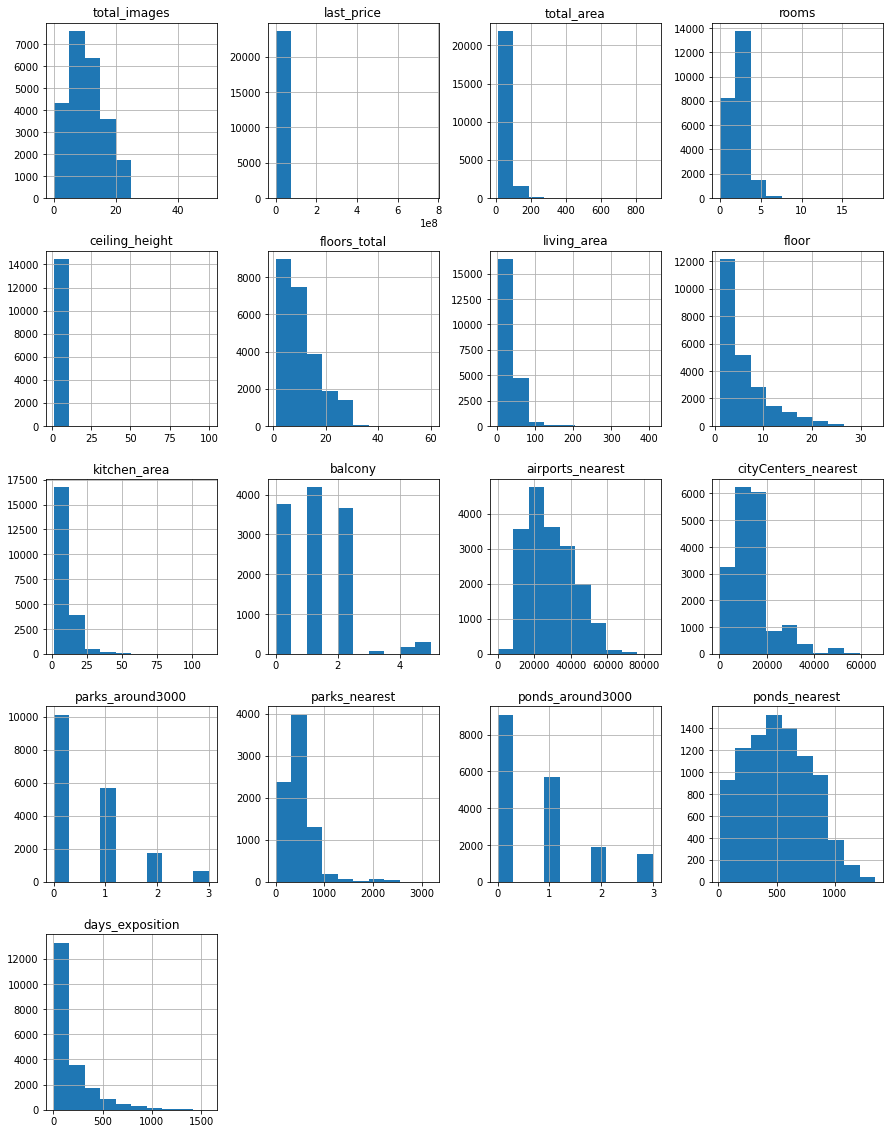

In [7]:
data.hist(figsize=(15, 20)) #построим гистограммы для всех числовых столбцов с размером графиков 15 на 20

Предобработка данных

In [8]:
data.isna().sum() #находим количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#чтобы было удобнее, расположим список в порядке убывания

In [10]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [11]:
#итого пропуски есть в is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height, airports_nearest, 
#cityCenters_nearest, ponds_around3000, parks_around3000, days_exposition, kitchen_area, living_area, floors_total, locality_name

In [12]:
data.columns #проверим названия колонок на правило хорошего стиля

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [13]:
#один столблец необходимо переименовать в соответствии с правилами хорошего стиля, это cityCenters_nearest

In [14]:
data['balcony'] = data['balcony'].fillna(0) #если есть пропуски в столбце balcony, значит балкона в квартире нет, соответственно заменим пропцщенные данные значением 0

In [15]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace = True)

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(0) #большинство пропусков находится в столбце is_apartment, значит квартира не относится к типу "апартаменты", значит заменим пропущенные значения на 0

In [17]:
#значения пропущены также в столбце ceiling_height, высота потолка не может быть равна 0, заполним пропуски медианным значением

In [18]:
ceiling_height_median = data['ceiling_height'].median()

In [19]:
ceiling_height_median

2.65

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median) #заменили пропуски в столбце 'ceiling_height' на медианное значение

In [21]:
data['ceiling_height'].sort_values(ascending=False).head(50) #посмотрим высоту потолков

22869    100.00
3148      32.00
22336     32.00
21377     27.50
4876      27.00
17857     27.00
5246      27.00
20478     27.00
22938     27.00
5807      27.00
21824     27.00
10773     27.00
5669      26.00
18545     25.00
4643      25.00
9379      25.00
11285     25.00
14382     25.00
355       25.00
6246      25.00
5076      24.00
20507     22.60
17496     20.00
15061     14.00
22309     10.30
5863       8.30
3474       8.00
15743      8.00
17442      8.00
20264      6.00
21227      5.80
1388       5.60
7578       5.50
12628      5.30
1026       5.30
464        5.20
1053       5.00
21923      4.90
2802       4.80
1300       4.70
19142      4.70
12401      4.65
2823       4.50
9783       4.50
10159      4.50
6802       4.50
13224      4.50
14519      4.50
3067       4.50
7521       4.45
Name: ceiling_height, dtype: float64

In [22]:
#высота потолков явно не может быть 100 метров, скорее всего ошибка в данных, возможно в данных ошибка в запятой

In [23]:
data.loc[data['ceiling_height'] >= 10.0, 'ceiling_height'] = data['ceiling_height']/10 #если высота больше 10, то разделим этот ее на 10

In [24]:
data['ceiling_height'].sort_values(ascending=False).head(50) #ещё раз проверим данные о высоте потолков

22869    10.00
5863      8.30
17442     8.00
3474      8.00
15743     8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
10159     4.50
6802      4.50
2823      4.50
3067      4.50
14519     4.50
13224     4.50
9783      4.50
8018      4.45
7521      4.45
6728      4.40
11651     4.40
7274      4.40
4201      4.37
10754     4.30
17078     4.25
11128     4.20
22494     4.20
6617      4.20
19041     4.20
2843      4.20
22055     4.20
20873     4.20
7279      4.20
6901      4.20
14619     4.20
2639      4.19
2999      4.19
154       4.15
15567     4.14
4892      4.10
11239     4.10
6127      4.10
Name: ceiling_height, dtype: float64

In [25]:
floors_total_median = data['floors_total'].median() #найдем медианные значения столбца floors_total

In [26]:
floors_total_median

9.0

In [27]:
data['floors_total'] = data['floors_total'].fillna(floors_total_median) #заменили пропуски в столбце 'floors_total' на медианное значение

In [28]:
#сделаем со столбцом living_area тоже самое

In [29]:
living_area_median = data['living_area'].median() #найдем медианные значени столбца living_area
living_area_median

30.0

In [30]:
data['living_area'] = data['living_area'].fillna(living_area_median) #заменили пропуски в столбце 'living_area' на медианное значение

In [31]:
kitchen_area_median = data['kitchen_area'].median() #найдем медианные значени столбца kitchen_area
kitchen_area_median 

9.1

In [32]:
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median) #заменили пропуски в столбце 'kitchen_area' на медианное значение

In [33]:
data.dtypes #проверим тимы данных

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [34]:
# необходимо преобпазовать столбец first_day_exposition к типу datetime 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [35]:
# необходимо также изменить тип данных у 'last_price', 'balcony' на int

In [36]:
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))

In [37]:
#проверяем типы данных
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [38]:
# необходимо также заменить тип данных у is_apartment с object на bool
data['is_apartment'] = data['is_apartment'].astype(bool)

In [39]:
#сделаем проверку всех столбцов

In [40]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [41]:
#явных дубликатов нет, найдем неявные 

In [42]:
#переведем в строчные буквы столбец locality_name
data['locality_name'] = data['locality_name'].str.lower()

In [43]:
#выведем уникальные значения этого столбца
set(data['locality_name'].unique())

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок янино-1',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня закл

In [44]:
#из списка видно, что поселок и посёлок дублируются
# заменяем поселок на посёлок 
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [45]:
#снова выведем уникальные значения для проверки
set(data['locality_name'].unique())

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской посёлок большая ижора',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'д

In [46]:
#в locality_name находится 49 пропущенных значений, заменим их на unknown

In [47]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [48]:
data['locality_name'].isna().sum() #проверим количество пропусков в столбце

0

In [49]:
data['parks_nearest'].round(2) #посмотрим данные о расстроянии до ближайшего парка

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [50]:
#встречаются значения NaN, оставим их неизменными, это значит, что объект находится далеко от парков

In [51]:
data.isna().sum() #проверим ещё раз количество пропусков в таблице

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

сделаем выводы по ставшимся пропускам:airports_nearest оставим неизменным, пропуски означают, что объект находится далеко от аэропорта
пропуски в citycenters_nearest означают, что объект находится не в городе
пропуски в parks_around3000 означают, что она таком расстроянии нет парков, оставим их
пропуски в parks_nearest означают, что по близости нет парков
отсавим пропуски в ponds_nearest, это означает, что объект находится далеко от водоемов
пропуски в days_exposition означают,что объект ещё не продан, также их оставим.
На этом предобработка данных выполнена. 

Добавим в таблицу новые столбцы

In [52]:
#нужно добавить столбец с ценой одного квадратного метра, назовем его price_on_one_metr

In [53]:
# для этого необходимо разделить last_price на total_area
data['price_on_one_metr'] = data['last_price'] / data['total_area']

In [54]:
data.head(10) #выведем первые 10 строк, чтобы проверить добавился ли новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_on_one_metr
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164


In [55]:
#цена выглядит некрасиво, округлим значения и снова проверим
data['price_on_one_metr'] = data['price_on_one_metr'].round(2)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_on_one_metr
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59


In [56]:
#нужно добавить день публикации объявления (0 - понедельник, 1 - вторник и т. д.) Добавим столбец day_public

In [57]:
data['day_public'] = data['first_day_exposition'].dt.weekday 

In [58]:
#добавим стообец с месяцем публикации 
data['month_public'] = data['first_day_exposition'].dt.month

In [59]:
#добавим столбец с годом публикации
data['year_public'] = data['first_day_exposition'].dt.year

In [60]:
#проверяем добавление новых столбцов
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_on_one_metr,day_public,month_public,year_public
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017


In [61]:
#далее нужно указать тип этажа квартиры (значения — «первый», «последний», «другой»)

In [62]:
#создадим функцию для определения этажности в доме
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [63]:
# добавим столбец в таблицу
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [64]:
#выведем 10 значений, чтобы проверить добавление столбца
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_on_one_metr,day_public,month_public,year_public,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой


In [65]:
#нужно добавить расстояние до центра города в километрах

In [66]:
data['distance_to_centr_km'] = round(data['city_centers_nearest'] / 1000)

In [67]:
#проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_on_one_metr,day_public,month_public,year_public,floor_category,distance_to_centr_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [68]:
#выполним анализ жилой площади

In [69]:
data['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

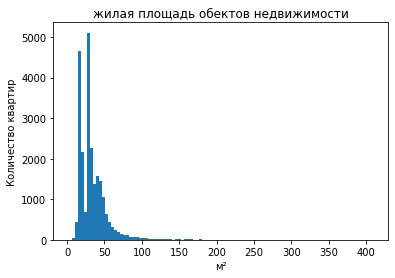

In [70]:
plt.hist(data['living_area'], bins=100, range=(2,409))
plt.title('жилая площадь обектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

In [71]:
#изменим range, поскольку из графика видно, что объектов площадью больше 100 кв м очень мало, верхнее значение возьмем 42

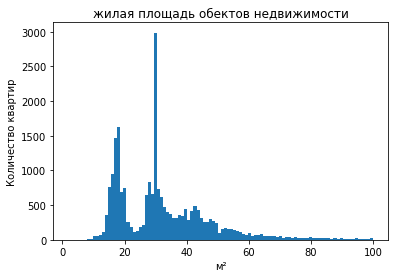

In [72]:
plt.hist(data['living_area'], bins=100, range=(2,100))
plt.title('жилая площадь обектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Из гистограммы можно сделать вывод, что больше всего объектов площадью 18 кв метров и 30

In [73]:
#произведем анализ площади кухни
data['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

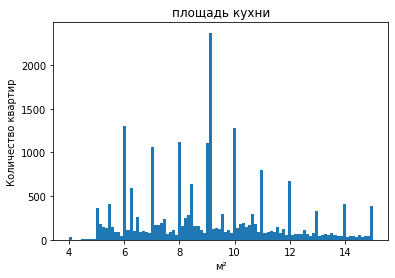

In [74]:
plt.hist(data['kitchen_area'], bins=100, range=(4,15))
plt.title('площадь кухни')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Больше всего объектов с площадью кухни 9 кв метров

In [75]:
#выполним анализ общей площади

In [76]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

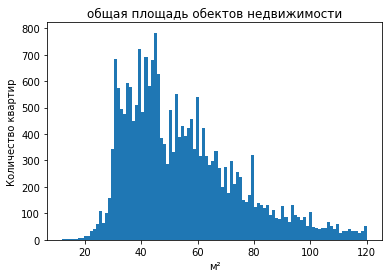

In [77]:
plt.hist(data['total_area'], bins=100, range=(12,120))
plt.title('общая площадь обектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Вывод: большинство квартир имеют площадь от 30 до 65 м². Чаще всего встречаются квартиры около 45 кв метров. До 20 кв метров выборка крайне мала.

In [78]:
#произведем анализ цены
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

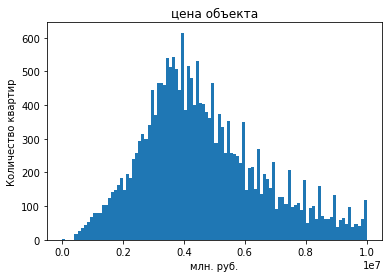

In [79]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04, 10.00000e+06))
plt.title('цена объекта')
plt.xlabel('млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

In [80]:
#произведем анализ количества комнат
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

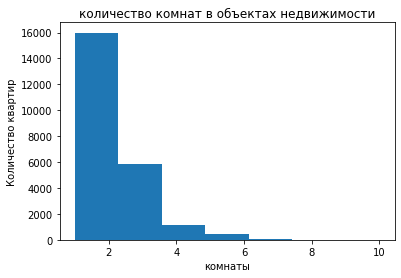

In [81]:
plt.hist(data['rooms'], bins=7, range=(1,10))
plt.title('количество комнат в объектах недвижимости')
plt.xlabel('комнаты')
plt.ylabel('Количество квартир')
plt.show()

Минимальное количество комнат 0 явно ошибка, поэтому range поставили от 1 до 10. В большинстве квартир количество комнат 1 или 2, меньше с 3, далее совсем немного

In [82]:
#проанализируем высоту потолков
data['ceiling_height'].describe()

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

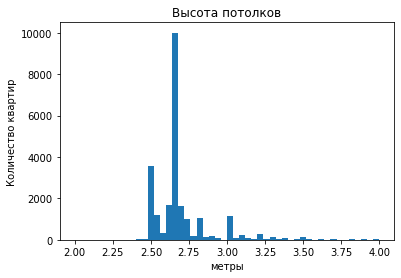

In [83]:
plt.hist(data['ceiling_height'], bins=50, range=(2,4))
plt.title('Высота потолков')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()

Самая популярная высота потолкров составляет примерно 2.6 метра


In [84]:
# определим тип этажа квартиры («первый», «последний», «другой»)

In [85]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

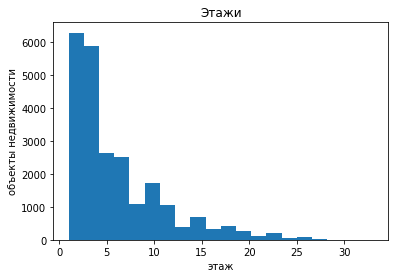

In [86]:
plt.hist(data['floor'], bins=20, range=(1,33))
plt.title('Этажи')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Самые популярные этажи в объектах с 1 по 5. Выполним исследование по типу этажа квартиры «первый», «последний», «другой»

In [87]:
data['floor_category'].describe()

count      23699
unique         3
top       другой
freq       17441
Name: floor_category, dtype: object

In [88]:
data['floor_category'].value_counts() #посмотрим количество квартир в каждой категории «первый», «последний», «другой»

другой       17441
последний     3341
первый        2917
Name: floor_category, dtype: int64

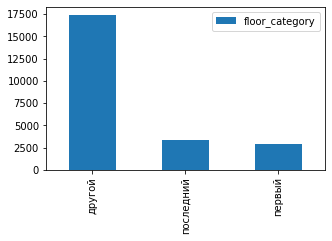

In [89]:
#построим график 
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

Меньше всего квартир расположено на первом или последнем этаже, самая популярная категирия "другой".

In [90]:
#общее количество этажей в доме
data['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

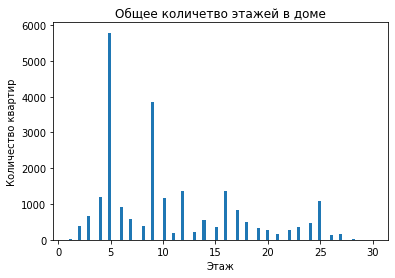

In [91]:
plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.title('Общее количетво этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир продается в 5 этажных домах, на втором месте по популярности 9 этажки

In [92]:
#расстояние до центра города в метрах
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

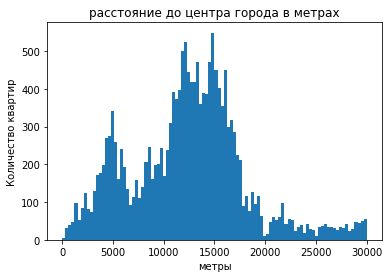

In [93]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,30000))
plt.title('расстояние до центра города в метрах')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир расположено от 10 до 16 км до центра, также наблюдается пик на расстоянии 5 км. 

In [94]:
#Расстояние до ближайшего парка
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

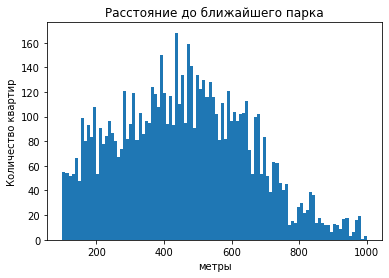

In [95]:
plt.hist(data['parks_nearest'], bins=100, range=(100,1000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()

Среднее расстояние от квартиры до ближайшего парка 300-600 метров.

In [96]:
data.shape #проверим с помощью метода shape, сколько осталось данных от изначальных. Видим, что значения не изменились

(23699, 28)

In [97]:
#Изучим как быстро продавались квартиры

In [98]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

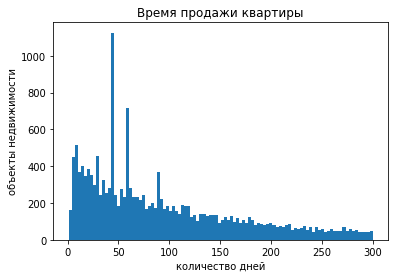

In [99]:
plt.hist(data['days_exposition'], bins=100, range=(1,300))
plt.title('Время продажи квартиры')
plt.xlabel('количество дней')
plt.ylabel('объекты недвижимости')
plt.show()

In [100]:
#уменьшим значения range, чтобы график стал нагляднее

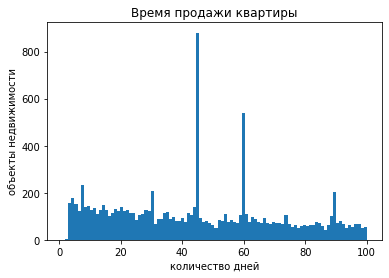

In [101]:
plt.hist(data['days_exposition'], bins=100, range=(1,100))
plt.title('Время продажи квартиры')
plt.xlabel('количество дней')
plt.ylabel('объекты недвижимости')
plt.show()

Квартиры чаще вего продают за 45 или 60 дней. Также наблюдается пик в 90 дней. Среднее значение продажи составляет 180 дней, медианное 95 дней. 
К быстрым продажам можно отнести те сделки, которые были совершенны до 45 дней, необычно долгие более 231 дня

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [102]:
#изучим зависимость цены last_price от общей площади, жилой площади, площади кухни, количества комнат, типа этажа, на котором расположена квартира (первый, последний, другой) и от даты размещения (день недели, месяц, год)

In [103]:
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms', 'day_public','month_public','year_public']).corr()

,day_public,kitchen_area,last_price,living_area,month_public,rooms,total_area,year_public
day_public,1.000000,0.486047,0.323738,0.089904,0.269221,-0.059111,0.320962,0.181063
kitchen_area,0.486047,1.000000,0.312370,0.125143,-0.020625,0.128989,0.423262,-0.309570
last_price,0.323738,0.312370,1.000000,0.635380,-0.019113,0.442449,0.738972,-0.052080
living_area,0.089904,0.125143,0.635380,1.000000,-0.155158,0.900067,0.927994,-0.066515
month_public,0.269221,-0.020625,-0.019113,-0.155158,1.000000,-0.289615,-0.056876,-0.355876
rooms,-0.059111,0.128989,0.442449,0.900067,-0.289615,1.000000,0.811538,-0.046553
total_area,0.320962,0.423262,0.738972,0.927994,-0.056876,0.811538,1.000000,-0.091682
year_public,0.181063,-0.309570,-0.052080,-0.066515,-0.355876,-0.046553,-0.091682,1.000000


Выводы: цена зависит от общей площади, от жилой площади и от количества комнат, цена слабо зависит от даты публикации и от площади кухни

Построим график зависимости цены от общей площади

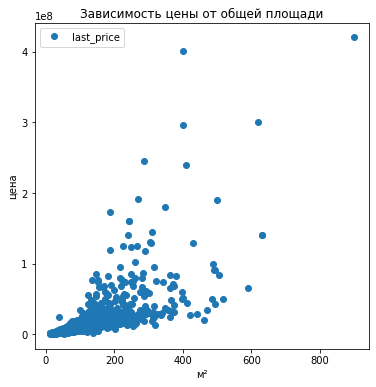

In [104]:
data.pivot_table(index='total_area', values='last_price').plot(style='o', figsize=(6, 6))
plt.title('Зависимость цены от общей площади')
plt.xlabel('м²')
plt.ylabel('цена')
plt.show()

Из графика видна прямая зависимость цены от общей площади квартиры

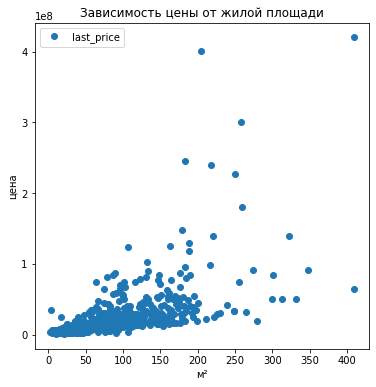

In [105]:
#построим график зависимости цены от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(style='o', figsize=(6, 6))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('м²')
plt.ylabel('цена')
plt.show()

Из графика видна прямая зависимость цены от жилой площади квартиры

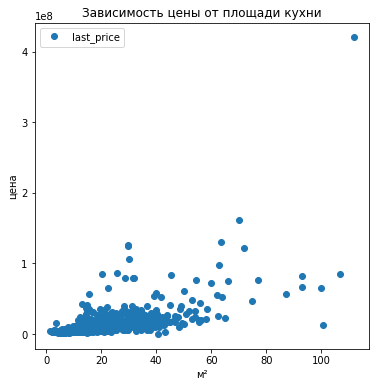

In [106]:
#построим график зависимости цены от площади кухни 
data.pivot_table(index='kitchen_area', values='last_price').plot(style='o', figsize=(6, 6))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('м²')
plt.ylabel('цена')
plt.show()

Также прослеживается прямая зависимость цены от площади кухни

<AxesSubplot:xlabel='rooms'>

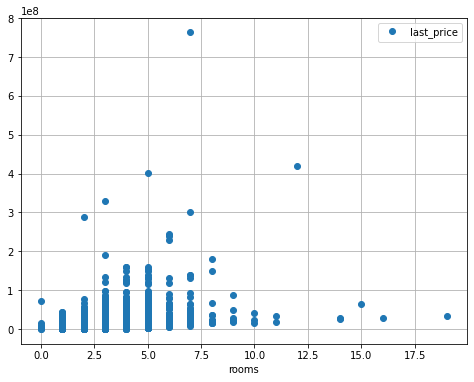

In [107]:
#построим график зависимости цены от количества комнат
data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(8, 6))

Наблюдаем зависимость цены от количества комнат

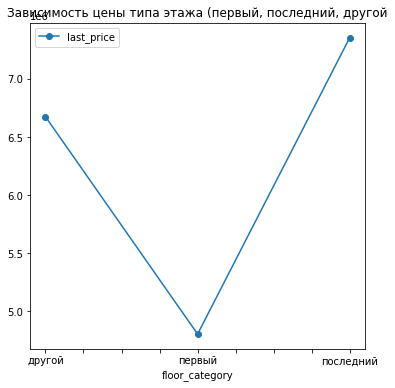

In [108]:
# определим зависимость цены от типа этажа (первый, последний, другой)
data.pivot_table(index='floor_category', values='last_price').plot(style='o-', figsize=(6, 6))
plt.title('Зависимость цены типа этажа (первый, последний, другой')
plt.show()

Цена на объект недвижимости, находящийся на первом этаже самая минимальная

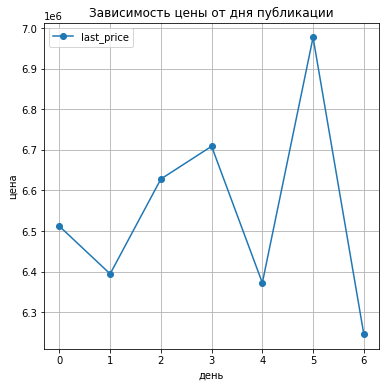

In [109]:
#определим зависимость цены от дня публикации
data.pivot_table(index='day_public', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.title('Зависимость цены от дня публикации')
plt.xlabel('день')
plt.ylabel('цена')
plt.show()

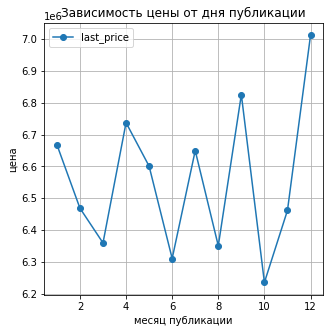

In [110]:
#определим зависимость цены от месяца публикации
data.pivot_table(index='month_public', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от дня публикации')
plt.xlabel('месяц публикации')
plt.ylabel('цена')
plt.show()

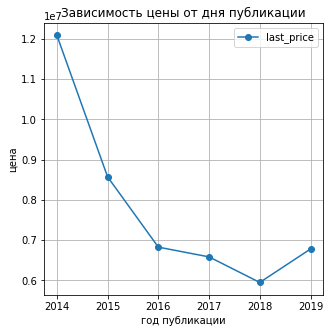

In [111]:
#определим зависимость цены от года публикации
data.pivot_table(index='year_public', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от дня публикации')
plt.xlabel('год публикации')
plt.ylabel('цена')
plt.show()

Общие выводы: Наблюдается прямая зависимость стоимости от жилой площади, общей площади и количества комнат
Квартиры, расположенные на 1 этаже значительно дешевле остальных
Цена слабо зависит от площади кухни и от дня публикации, однако наблюдаем тенденцию снижения стоимости квартир по годам, рост начался только в 2019

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [112]:
top_ten = data['locality_name'].value_counts() #посчитаем количество объявлений в каждом населенном пункте

In [113]:
top_ten.head(10)

санкт-петербург      15721
посёлок мурино         556
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [114]:
#рассчитаем среднюю стоимость кв метра в каждом из населенных пунктов

In [115]:
top_ten = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
top_ten.columns = ['count']
top_ten = top_ten.sort_values(by='count', ascending=False).head(10)
top_ten['price_on_one_metr'] = data.pivot_table(index='locality_name', values='price_on_one_metr').round(2)
top_ten.sort_values(by='price_on_one_metr', ascending=False)

,count,price_on_one_metr
locality_name,,
санкт-петербург,15721,114849.01
пушкин,369,103125.82
деревня кудрово,299,92473.55
посёлок парголово,327,90175.91
посёлок мурино,556,85681.76
посёлок шушары,440,78677.36
колпино,338,75424.58
гатчина,307,68746.15
всеволожск,398,68654.47


Выводы: Наибольшая цена за квадратный метр в Санкт-Петербурге, Далее Пушкин и деревня Кудрово. Самая низкая стоимость в Выборге

Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра

In [116]:
data.query('locality_name == "санкт-петербург"')['distance_to_centr_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_to_centr_km, dtype: float64

Text(0, 0.5, 'Цена')

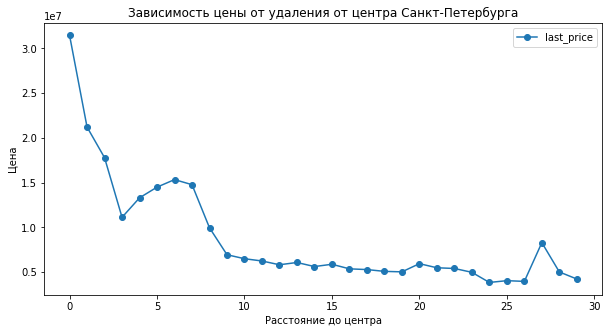

In [117]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='distance_to_centr_km', values='last_price').plot(style='o-', figsize=(10, 5))
plt.title('Зависимость цены от удаления от центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')

In [118]:
data.query('locality_name == "санкт-петербург"').pivot_table(values='last_price', index='distance_to_centr_km')

,last_price
distance_to_centr_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


Вывод: наблюдаем прямую зависимость стоимости квартиры от удаления от центра Санкт-Петербурга

Общий вывод:
Изучили общую информацию о файле. Были найдены пропущенные значения и неверный тип данных, пропущенные заменили на 0, либо на медианное значени, тип данных был изменен. Явные дубликаты в датафрейме отсутствуют.
Выполнили предобработку данных. Причины появления пропусков: человеческий фактор и, возможно, программный сбой.
Больше всего на стоимость объекта недвижимости вляет общая и жилая площадь квартиры, чем она больше, тем стоимость выше.
Также на стоимость влияет количество комнат и расстояние до центра города.
Квартиры чаще вего продают за 45 или 60 дней.
Среднее значение продажи составляет 180 дней, медианное 95 дней.
К быстрым продажам можно отнести те сделки, которые были совершенны до 45 дней, необычно долгие более 231 дня.
Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Наибольшая цена за квадратный метр в Санкт-Петербурге, Далее Пушкин и деревня Кудрово. Самая низкая стоимость в Выборге. 
Вычислена средняя стоимость квартиры от расстояния до центра Санкт-Петербурга. Чем ближе квартира к центру, тем она дороже.